In [1]:
from kan.utils import create_dataset
from kan import *
model = KAN(width=[2,5,1])
f = lambda x: 3*x[:,[0]]**3+2*x[:,[0]]+4 + 2 * x[:,[0]] * x[:,[1]] ** 2 + 3 * x[:,[1]] ** 3
dataset = create_dataset(f, n_var=2)

checkpoint directory created: ./model
saving model version 0.0


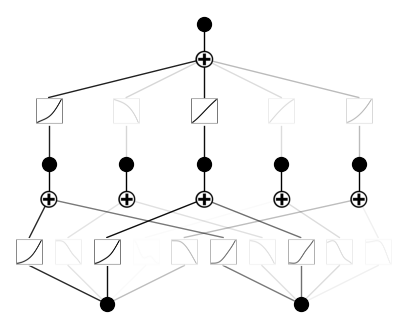

In [2]:
model(dataset['train_input']);
model.plot()

